# Programación 201

### Ejercicio 1

Carga los datos desde el archivo `netflixtitles.csv` , que puedes encontrar en la carpeta `data`, en un *dataframe*. Este conjunto de datos recoje información sobre películas y séries de TV de Netflix (https://www.kaggle.com/shivamb/netflix-shows) hasta el 2019.  

Muestra el número de filas del *dataframe* y los nombres de las columnas.

*Consideraciones:*

*  Muestra únicamente la información pedida en el enunciado.


In [1]:
# Respuesta

# Importamos las librerías.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Cargamos los datos del fichero en un dataframe.
df_netflix = pd.read_csv('https://raw.githubusercontent.com/marcusRB/The_Bridge_School_DataScience_PT/main/02_DataAnalysis/dataset/netflixtitles.csv', delimiter = ",", header = 0)


In [2]:
# Mostramos el número de filas y los nombres de las columnas del dataframe.
rows = len(df_netflix)
columns = df_netflix.columns

print(f"El número de filas del dataframe es: {rows}")
print(f"Los nombres de las columnas del dataframe son: \n {(','.join(columns))}")

El número de filas del dataframe es: 6234
Los nombres de las columnas del dataframe son: 
 show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Ejercicio 2

Agrupa los datos cargados en el ejercicio 1 por **año** y, para cada año, muestra el número total de películas (*Movies*) y series de TV (*TV Show*) por separado. 

**Nota:** Al Notebook de teoría hemos visto cómo calcular la media de una agrupación de datos. Para resolver este ejercicio necesitarás investigar cómo contar (*count*) todos los valores de una columna en una agrupación. Te puede ser de utilidad la función [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) de pandas, la que nos permite aplicar diferentes funciones a una columna en un ```groupby```.


In [3]:
# Respuesta
# Agrupamos los datos por año y lo guardamos en una variable.
df_netflix_grouped = df_netflix.groupby(['release_year'])

# Contamos el número total de películas y series para cada año con la función `value_counts`.
df_netflix_grouped['type'].value_counts()

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2018          TV Show    417
2019          TV Show    443
              Movie      400
2020          TV Show     19
              Movie        6
Name: type, Length: 115, dtype: int64

In [4]:
# Iteramos sobre el dataframe agrupado por año y mostramos la información que nos interesa.
for year, df_year in df_netflix_grouped:
    # Creamos dos variables, una para el número de películas y otra para el número de series.
    movies = len(df_year[df_year['type'] == "Movie"])
    tv_shows = len(df_year[df_year['type'] == "TV Show"])
    print(f"En el año {year}, se vieron {movies} series y {tv_shows} películas")



En el año 1925, se vieron 0 series y 1 películas
En el año 1942, se vieron 2 series y 0 películas
En el año 1943, se vieron 3 series y 0 películas
En el año 1944, se vieron 3 series y 0 películas
En el año 1945, se vieron 3 series y 0 películas
En el año 1946, se vieron 2 series y 1 películas
En el año 1947, se vieron 1 series y 0 películas
En el año 1954, se vieron 1 series y 0 películas
En el año 1955, se vieron 1 series y 0 películas
En el año 1956, se vieron 1 series y 0 películas
En el año 1958, se vieron 2 series y 0 películas
En el año 1959, se vieron 1 series y 0 películas
En el año 1960, se vieron 4 series y 0 películas
En el año 1962, se vieron 3 series y 0 películas
En el año 1963, se vieron 0 series y 1 películas
En el año 1964, se vieron 1 series y 0 películas
En el año 1965, se vieron 2 series y 0 películas
En el año 1966, se vieron 1 series y 0 películas
En el año 1967, se vieron 2 series y 1 películas
En el año 1968, se vieron 3 series y 1 películas
En el año 1969, se v

### Ejercicio 3

Muestra las películas estrenadas el _2019_ que tienen una duración superior a _100_ minutos. 

**Nota:** Al Notebook de teoría hemos visto operaciones básicas de filtrado. Para resolver este ejercicio necesitarás investigar cómo aplicar condiciones más complejas. 

**Nota 2:** Los valores de la columna de duración (*duration*) son strings, ya que combinan números y letras. Por lo tanto, se tienen que transformar a int una vez se haya construido el subset de datos de películas. Te puede ser de utilidad la función [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) de pandas.
 


In [5]:
# Respuesta
# Filtramos el dataframe por películas.
df_Movies = df_netflix[df_netflix['type'] == "Movie"]

# Mostramos las películas que cumplen dos criterios: estrenadas en 2019 y duración superior a 100 minutos.
df_netflix[(df_netflix.release_year == 2019) & ((df_Movies.duration.astype('int32')) > 100)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,"September 6, 2019",2019,TV-MA,125,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...
57,81078908,Movie,The World We Make,Brian Baugh,"Caleb Castille, Rose Reid, Kevin Sizemore, Gre...",United States,"September 4, 2019",2019,PG,108,"Dramas, Romantic Movies",A teenage equestrian and a local football play...
102,80231903,Movie,In the Shadow of the Moon,Jim Mickle,"Boyd Holbrook, Michael C. Hall, Cleopatra Cole...",United States,"September 27, 2019",2019,TV-MA,116,"Dramas, Sci-Fi & Fantasy, Thrillers",A Philadelphia detective slowly unravels as he...
109,81177238,Movie,Malaal,Mangesh Hadawale,"Meezaan Jaffrey, Sharmin Segal, Chinmaya Surve...",India,"September 26, 2019",2019,TV-14,133,"International Movies, Romantic Movies",Class divides become thorns in the budding rom...
119,81186758,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 25, 2019",2019,TV-14,146,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
...,...,...,...,...,...,...,...,...,...,...,...,...
5347,81076749,Movie,Ek Ladki Ko Dekha Toh Aisa Laga,Shelly Chopra Dhar,"Anil Kapoor, Sonam Kapoor, Rajkummar Rao, Juhi...",India,"April 2, 2019",2019,TV-14,120,"Comedies, Dramas, International Movies",As her family seeks to marry her off and a hop...
5359,81033430,Movie,Music Teacher,Sarthak Dasgupta,"Manav Kaul, Amrita Bagchi, Divya Dutta, Neena ...",India,"April 19, 2019",2019,TV-14,102,"Dramas, Independent Movies, International Movies",A dejected small-town music teacher grapples w...
5365,81080942,Movie,The Ruthless,Renato De Maria,"Riccardo Scamarcio, Sara Serraiocco, Alessio P...","Italy, France","April 19, 2019",2019,TV-MA,111,"Dramas, International Movies",A rebellious teen grows up to become one of Mi...
5385,81013626,Movie,HOMECOMING: A film by Beyoncé,Beyoncé Knowles-Carter,Beyoncé Knowles-Carter,NaN,"April 17, 2019",2019,TV-MA,138,"Documentaries, Music & Musicals","This intimate, in-depth look at Beyoncé's cele..."


### Ejercicio 4

Queremos buscar aquellos países donde se estrenaron más de 10 películas al año. Debes mostrar por pantalla el **año**, el **nombre del país** y el **número total de películas** estrenadas en el año correspondiente.

**Nota**: Además del contenido de los notebooks de teoría, puedes utilizar lo que has aprendido haciendo el ejercicio 2.


In [7]:
# Respuesta
# Agrupamos por países y años con un `groupby`.
df_grouped_country_year = df_netflix.groupby(['country', 'release_year'])



In [8]:
# Iteramos con un bucle for sobre el dataframe agrupado.
for country, df_country_year in df_grouped_country_year:
    # Creamos una nueva variable con el dataframe filtrado por película que recoja las películas totales.
    movies = len(df_country_year[df_country_year['type'] == "Movie"])
    # Establecemos la condición.
    if movies > 10:
        print(f"{country[0]} en el año {country[1]} estrenó un total de {movies} películas")

Canada en el año 2016 estrenó un total de 15 películas
Canada en el año 2017 estrenó un total de 20 películas
Canada en el año 2018 estrenó un total de 18 películas
India en el año 2004 estrenó un total de 13 películas
India en el año 2005 estrenó un total de 17 películas
India en el año 2006 estrenó un total de 17 películas
India en el año 2007 estrenó un total de 13 películas
India en el año 2008 estrenó un total de 24 películas
India en el año 2009 estrenó un total de 24 películas
India en el año 2010 estrenó un total de 31 películas
India en el año 2011 estrenó un total de 26 películas
India en el año 2012 estrenó un total de 33 películas
India en el año 2013 estrenó un total de 44 películas
India en el año 2014 estrenó un total de 38 películas
India en el año 2015 estrenó un total de 53 películas
India en el año 2016 estrenó un total de 66 películas
India en el año 2017 estrenó un total de 99 películas
India en el año 2018 estrenó un total de 79 películas
India en el año 2019 estr

### Ejercicio 5

Crea una copia del dataframe original añadiendo una nueva columna que nos indicará por cada fila la duración de la película. Definimos tres niveles:

- **short** : si la duración es inferior a 90 minutos. 
- **medium** : si la duración está entre 90 y 150 minutos.
- **long** : si la duración es superior a 150 minutos.

Muestra por pantalla aquellas filas que correspondan a una duración corta ( _short_ ). 

**Nota:** pandas nos ofrece principalmente tres maneras de añadir nuevas columnas a un dataframe existente. Cualquiera de las tres formas son válidas para resolver este ejercicio. Podéis buscar en Internet cómo añadir columnas a un dataframe de pandas, ya que la documentación presenta los tres métodos de forma separada.


In [9]:
# Respuesta
# Creamos la copia del dataframe original con la función `copy`.
df_netflix_copy = df_netflix.copy()

# Creamos la nueva columna que nos indicará la duración de la película.
df_netflix_copy['duration_movie'] = df_netflix_copy['duration']

# Mostramos el dataframe.
df_netflix_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_movie
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1 Season
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1 Season
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,99


In [10]:
# Importamos la librería numpy.
import numpy as np

# Filtramos el dataframe por películas y guardamos en una variable.
df_netflix_movies = df_netflix_copy[(df_netflix_copy['type'] == "Movie")]

# Creamos las condiciones y las alternativas correspondientes a cada condición.
conditions = [(df_netflix_movies.duration_movie.astype('float') < 90),
              ((df_netflix_movies.duration_movie.astype('float') >= 90) & (df_netflix_movies.duration_movie.astype('float') <= 150)),
              (df_netflix_movies.duration_movie.astype('float') > 150),
             ]
choices = ["Short", "Medium", "Long"]

# Creamos la nueva columna con la función `select` de numpy y las condiciones/alternativas anteriormente creadas. Rellenamos
# la columna por defecto con "NaN", que se rellenará en los casos no se pueda cumplir ninguna de las condiciones, para el resto
# de posibilidades se rellenarán los valores "Short", "Medium" y "Long" según las condiciones establecidas.
df_netflix_movies.loc[:, 'duration_movie'] = np.select(conditions, choices, default = "NaN")

# Mostramos el dataframe.
df_netflix_movies

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_movie
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Medium
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Medium
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,Medium
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",Medium
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...,Short
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,Medium
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,Short
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109,Documentaries,The journey of fashion designer Jeremy Scott f...,Medium


### Ejercicio 6

En este ejercicio trabajaremos con el dataset de Netflix, pero analizando las series de TV. Muestra un gráfico de barras con el número de series de TV americanas agrupadas por categoría (*listed_in*).


Consideraciones:

- Debes mostrar los datos de manera horizontal (barras horizontales).
- El eje de las Y debe incluir las etiquetas de las categorías de las series de TV.
- Debe incluir un texto con el número de series por cada categoría del gráfico. El texto debería estar situado a la derecha de cada barra.

**Nota**: En el Notebook de teoría hemos visto cómo mostrar gráficos lineares simples con el matplotlib. Para este ejercicio explora las funcionalidades que presenta la librería pandas para generar gráficos a partir de dataframes. También pueden ser de utilidad las funciones [text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html) o [annotate](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html) para mostrar el número de series al lado de cada barra. 


In [11]:
# Respuesta
# Filtramos el dataframe por TV Shows y guardamos en una variable.
df_american_TV_shows = df_netflix[(df_netflix['type'] == "TV Show") & (df_netflix['country'] == "United States")]

# Separamos la string que contiene la lista de géneros y utilizamos la función `explode` para convertir en filas cada elemento
# de las listas que acabamos de separar con el `split`. Guardamos el resultado en una variable.
genre_explode = df_american_TV_shows['listed_in'].str.split(",").explode()

# Para quitar los espacios iniciales y finales utilizamos la función `strip`.
genre_count = genre_explode.str.strip().value_counts()

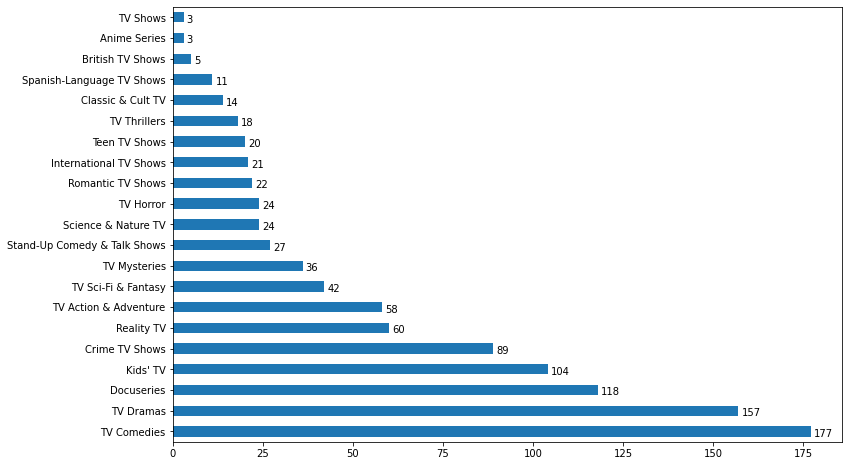

In [12]:
# Visualizamos el gráfico de barras horizontal.
ax = genre_count.plot(kind = 'barh', figsize = (12, 8))

# Obtenemos las barras dibujadas en el gráfico con `patches` e iteramos sobre ellas.
for bar in ax.patches:
    # Para cada barra, creamos una anotación sobre el gráfico, indicándole que queremos escribir el ancho numérico de la barra
    # como primer parámetro, la posición de la anotación como segundo parámetro y utilizamos los parámetros `xytext` y 
    # `textcords` para ajustar los márgenes.
    ax.annotate(bar.get_width(), (bar.get_x() + bar.get_width(), bar.get_y()), xytext=(3, 0), textcoords='offset points')

### Ejercicio Opcional

Python es un lenguaje de programación muy utilizado en el procesamiento de imágenes. En este ejercicio veremos una aplicación de detección de elementos en una imagen de microscopía de escaneo (en inglés: Scanning Element Microscopy (SEM)).

En esta imagen se puede ver una muestra de vidrio (gris claro) con algunas burbujas (elementos negros) y granos de arena (gris oscuro). Queremos ser capaces de detectar los diferentes elementos de la muestra a partir de la imagen.

Una imagen se puede ver como una matriz bidimensional donde cada elemento de la matriz corresponde al valor de un pixel de la imagen. Por ejemplo, si miramos la matriz de la imagen que os proporcionamos, veremos valores que van de 0 a 255. Así pues, para distinguir los diferentes elementos de la muestra de vidrio, nos tendremos que fijar en el nivel de gris de los píxeles de la imagen a través del histograma. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> 


Parte A: 

* Para poder identificar mejor los elementos de la muestra de vidrio, primero hemos aplicado un filtro de mediana para reducir el ruido. Grafica ahora la distribución de los píxeles de la imagen inicial y la imagen filtrada. ¿Qué diferencia puedes apreciar entre ambas distribuciones?

**Nota:** Utiliza la función [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) de la librería Seaborn para visualizar la distribución de los valores píxeles de la imagen.

Parte B: 

* Utilizando los valores del distribution plot de la imagen filtrada, determina unos umbrales que permitan diferenciar los píxeles de arena, los píxeles de vidrio y los píxeles de burbuja.

* Una vez que hayas definido los umbrales, muestra por pantalla una imagen donde cada uno de los elementos esté en un color diferente. 


In [18]:
!pip install -U seaborn-image

In [24]:
import scipy

In [25]:
# Respuesta
# Importamos las librerías.
from scipy import ndimage
import seaborn_image as isns

# Establecemos el tamaño por defecto de las figuras para que se muestren más grandes.
sns.set(rc={'figure.figsize':(15,10)})

# Utilizamos `imread` para cargar los valores numéricos de la imagen.
sem_img = plt.imread('https://github.com/marcusRB/The_Bridge_School_DataScience_PT/blob/main/02_DataAnalysis/dataset/SEM_image.jpg')



ImportError: ignored